In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hyper parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

In [4]:
# linear regression model
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

In [5]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# train the model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))

Epoch [10/60], Loss: 0.6291
Epoch [20/60], Loss: 0.5504
Epoch [30/60], Loss: 0.5359
Epoch [40/60], Loss: 0.5319
Epoch [50/60], Loss: 0.5297
Epoch [60/60], Loss: 0.5278


In [7]:
outputs

tensor([[0.7374],
        [1.2855],
        [1.8337],
        [2.4366],
        [2.5462],
        [1.1699],
        [3.9659],
        [2.1735],
        [2.8751],
        [0.1728],
        [2.6021],
        [4.4702],
        [1.7405],
        [3.0779],
        [0.6377]], grad_fn=<AddmmBackward>)

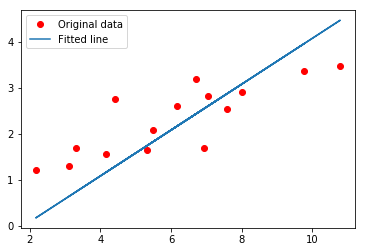

In [8]:
# plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# hyper parameters
input_size = 13
output_size = 1
num_epochs = 5000
learning_rate = 0.01

In [12]:
boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [ ]:
# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

# linear regression model
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).float()
    
    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    return val_loss.item()

In [ ]:
# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    # data shuffle
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]

    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 200 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

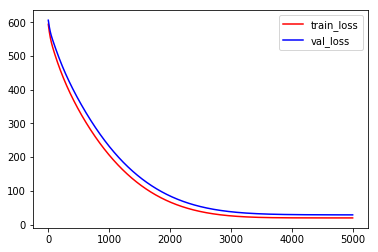

In [13]:
# plot learning curve
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()